In [1]:
#Loading basic libraries for data exploration
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from fancyimpute import KNN
from ggplot import *

Using TensorFlow backend.


In [2]:
#setting the working directory
os.chdir('G:/Edwiser material/Project/buffer project')

In [3]:
#Check working directory
os.getcwd()

'G:\\Edwiser material\\Project\\buffer project'

In [4]:
#Loading the data to environment
df =pd.read_csv("credit-card-data.csv")

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
#Head of the data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
#Deleting the CUST_ID column as it is ID numbers not important in modelling
del df['CUST_ID']

In [8]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [9]:
missing_val

,Variables,Missing_percentage
0,MINIMUM_PAYMENTS,3.497207
1,CREDIT_LIMIT,0.011173
2,BALANCE,0.000000
3,CASH_ADVANCE_FREQUENCY,0.000000
4,PRC_FULL_PAYMENT,0.000000
5,PAYMENTS,0.000000
6,PURCHASES_TRX,0.000000
7,CASH_ADVANCE_TRX,0.000000
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000
9,BALANCE_FREQUENCY,0.000000


In [11]:
#Apply KNN imputation algorithm for imputing the missing values
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

Imputing row 1/8950 with 0 missing, elapsed time: 19.569
Imputing row 101/8950 with 0 missing, elapsed time: 19.573
Imputing row 201/8950 with 0 missing, elapsed time: 19.573
Imputing row 301/8950 with 0 missing, elapsed time: 19.577
Imputing row 401/8950 with 0 missing, elapsed time: 19.577
Imputing row 501/8950 with 0 missing, elapsed time: 19.581
Imputing row 601/8950 with 0 missing, elapsed time: 19.581
Imputing row 701/8950 with 0 missing, elapsed time: 19.585
Imputing row 801/8950 with 0 missing, elapsed time: 19.585
Imputing row 901/8950 with 0 missing, elapsed time: 19.589
Imputing row 1001/8950 with 0 missing, elapsed time: 19.589
Imputing row 1101/8950 with 0 missing, elapsed time: 19.593
Imputing row 1201/8950 with 0 missing, elapsed time: 19.597
Imputing row 1301/8950 with 0 missing, elapsed time: 19.597
Imputing row 1401/8950 with 0 missing, elapsed time: 19.597
Imputing row 1501/8950 with 0 missing, elapsed time: 19.597
Imputing row 1601/8950 with 0 missing, elapsed time:

# ADVANCED DATA PREPARATION #

# Deriving new KPI of Monthly average Purchases

In [12]:
#MONTHLY avg purchases Derivation
df['MONTH_AVG_PURCHASES'] = df['PURCHASES']/df['TENURE']

In [13]:
df['MONTH_AVG_PURCHASES'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: MONTH_AVG_PURCHASES, dtype: float64

In [14]:
#Monthly cash advance derivation
df['MONTHLY_CASH_ADVANCE'] = df['CASH_ADVANCE']/df['TENURE']

In [15]:
df['MONTHLY_CASH_ADVANCE'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: MONTHLY_CASH_ADVANCE, dtype: float64

# Purchases by type (one-off, instalments)

In [16]:
#Looking at the data of both ONEOFF_PURCHASES and INSTALLMENTS_PURCHSES 
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


In [17]:
#Total no of Oneoff_Purchases which are having minimum purchases
sum(df['ONEOFF_PURCHASES'] > 0)

4648

In [18]:
#Total no of Installment purchases 
sum(df['INSTALLMENTS_PURCHASES'] > 0)

5034

In [19]:
#Total no of Oneoff_purchases which are zero
sum(df['ONEOFF_PURCHASES']==0)

4302

In [20]:
#Total no of installments purchases which are zero
sum(df['INSTALLMENTS_PURCHASES']==0)

3916

In [21]:
#no of both oneoff purchases and installment purchases which are greater than zero 
sum((df['ONEOFF_PURCHASES'] > 0)&(df['INSTALLMENTS_PURCHASES'] > 0))

2774

In [22]:
#no of both oneoff purchases and installment purchases which are qual to zero
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 19)

In [23]:
#no of oneoff purchases are zero and installment purchases are greater than zero
sum((df['ONEOFF_PURCHASES'] == 0)&(df['INSTALLMENTS_PURCHASES'] > 0))

2260

In [24]:
#no of one off purchases are higher than zero and installments are zero
sum((df['ONEOFF_PURCHASES'] > 0)&(df['INSTALLMENTS_PURCHASES'] == 0))

1874

In [25]:
df.shape

(8950, 19)

In [26]:
#With the above details it is clear that there four different types of transaction which are used for 
#deriving a new feature

In [27]:
#creating a definition for new features
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'NONE'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'ONEOFF_INSTALLMENT'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'ONEOFF'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALLMENT'

In [28]:
#Applying the new features to data
df['PURCHASE_TYPE']=df.apply(purchase,axis=1)

In [29]:
df['PURCHASE_TYPE'].value_counts()

ONEOFF_INSTALLMENT    2774
INSTALLMENT           2260
NONE                  2042
ONEOFF                1874
Name: PURCHASE_TYPE, dtype: int64

# Limit usage (balance to credit limit ratio)

In [30]:
# Limit usage calculation from balance to credit ratio
df['limit_usage']=df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [31]:
df['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

# Payments to minimum payments ratio

In [32]:
#Payments to minimum payments ratio calculation
df['Payment_minpay_Ratio'] = df.apply(lambda x: x['PAYMENTS']/x['MINIMUM_PAYMENTS'], axis=1)

In [33]:
df['Payment_minpay_Ratio'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: Payment_minpay_Ratio, dtype: float64

In [34]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTH_AVG_PURCHASES,MONTHLY_CASH_ADVANCE,PURCHASE_TYPE,limit_usage,Payment_minpay_Ratio
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,INSTALLMENT,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,NONE,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,ONEOFF,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,441.852935,0.000000,12.0,124.916667,17.149001,ONEOFF,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,ONEOFF,0.681429,2.771075


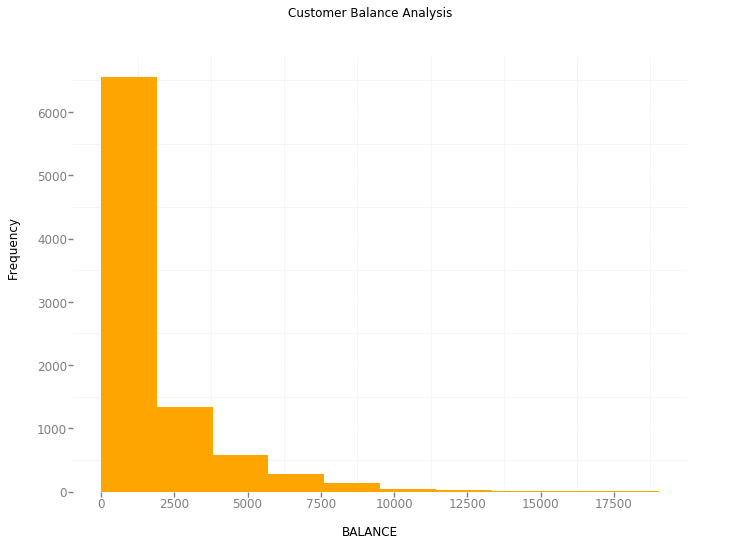

<ggplot: (-9223371861822379120)>

In [35]:
# histogram
ggplot(df, aes(x='BALANCE'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("BALANCE")+ ylab('Frequency')+ ggtitle("Customer Balance Analysis")+ theme_bw()

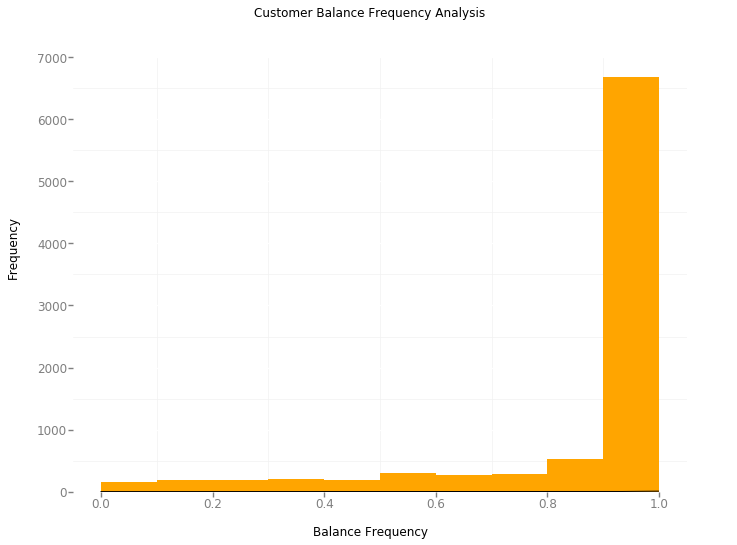

<ggplot: (-9223371861822299860)>

In [36]:
# histogram
ggplot(df, aes(x='BALANCE_FREQUENCY'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("Balance Frequency")+ ylab('Frequency')+ ggtitle("Customer Balance Frequency Analysis")+ theme_bw()

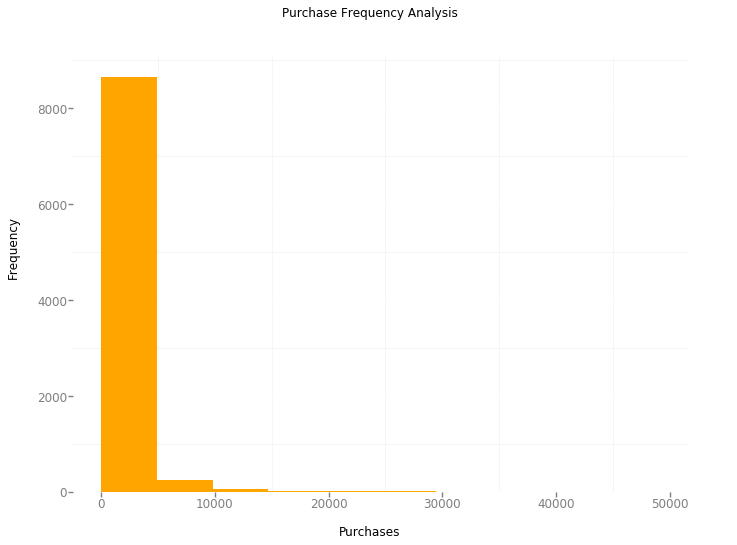

<ggplot: (-9223371861822253984)>

In [37]:
# histogram
ggplot(df, aes(x='PURCHASES'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("Purchases")+ ylab('Frequency')+ ggtitle("Purchase Frequency Analysis")+ theme_bw()

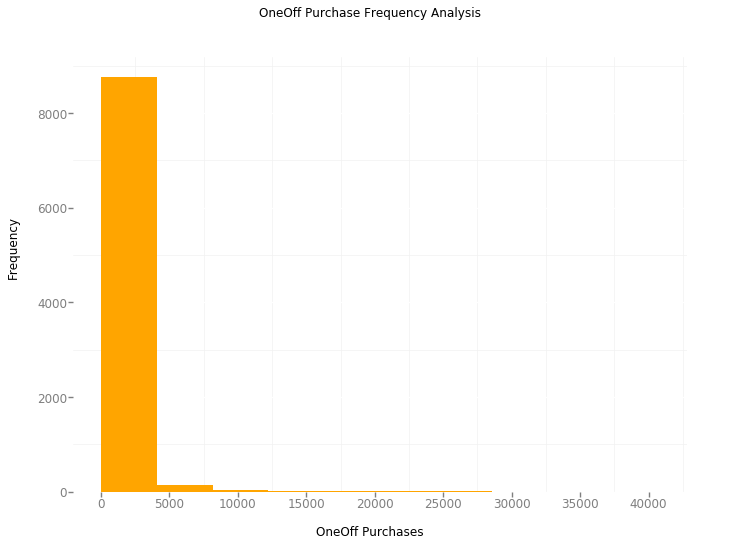

<ggplot: (-9223371861822254004)>

In [38]:
# histogram
ggplot(df, aes(x='ONEOFF_PURCHASES'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("OneOff Purchases")+ ylab('Frequency')+ ggtitle("OneOff Purchase Frequency Analysis")+ theme_bw()

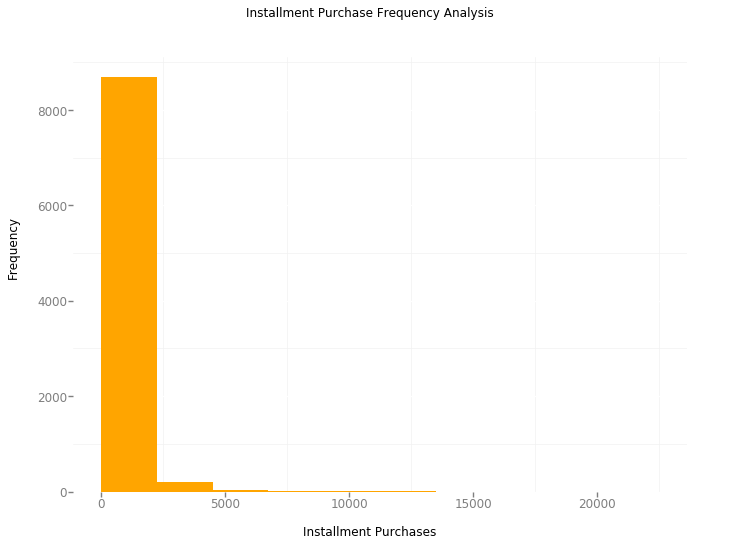

<ggplot: (-9223371861822149688)>

In [39]:
# histogram
ggplot(df, aes(x='INSTALLMENTS_PURCHASES'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("Installment Purchases")+ ylab('Frequency')+ ggtitle("Installment Purchase Frequency Analysis")+ theme_bw()

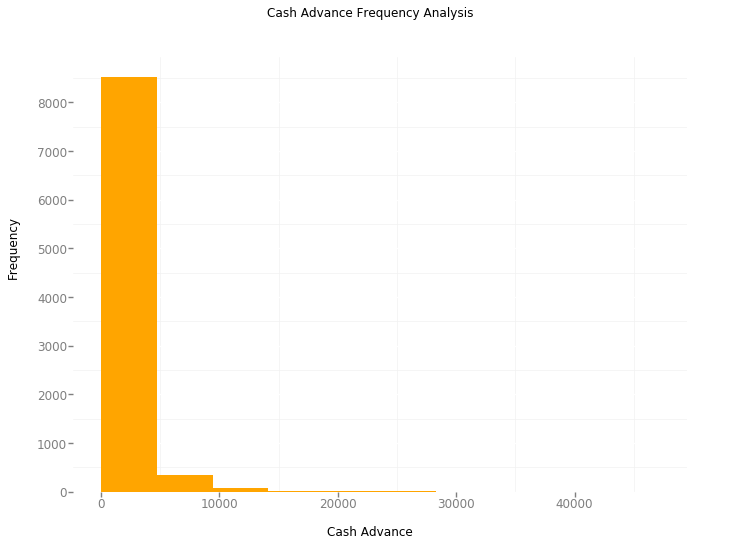

<ggplot: (-9223371861822103832)>

In [40]:
# histogram
ggplot(df, aes(x='CASH_ADVANCE'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("Cash Advance")+ ylab('Frequency')+ ggtitle("Cash Advance Frequency Analysis")+ theme_bw()

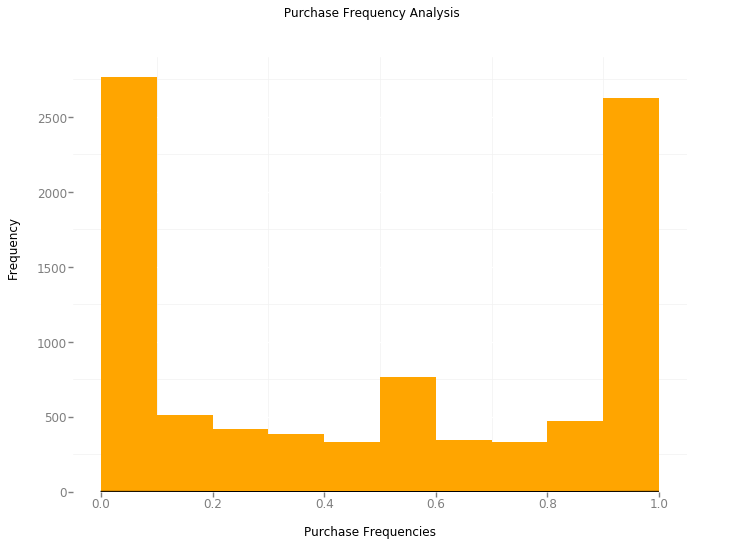

<ggplot: (-9223371861822103852)>

In [41]:
# histogram
ggplot(df, aes(x='PURCHASES_FREQUENCY'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("Purchase Frequencies")+ ylab('Frequency')+ ggtitle(" Purchase Frequency Analysis")+ theme_bw()

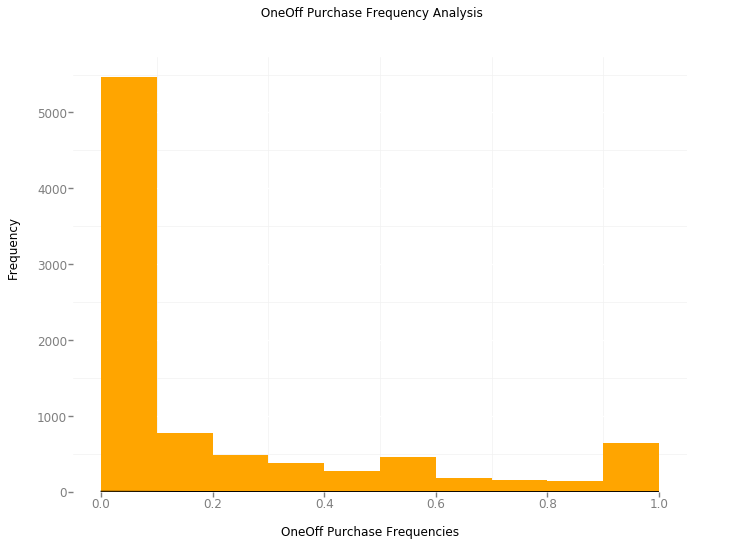

<ggplot: (-9223371861821991632)>

In [42]:
# histogram
ggplot(df, aes(x='ONEOFF_PURCHASES_FREQUENCY'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("OneOff Purchase Frequencies")+ ylab('Frequency')+ ggtitle(" OneOff Purchase Frequency Analysis")+ theme_bw()

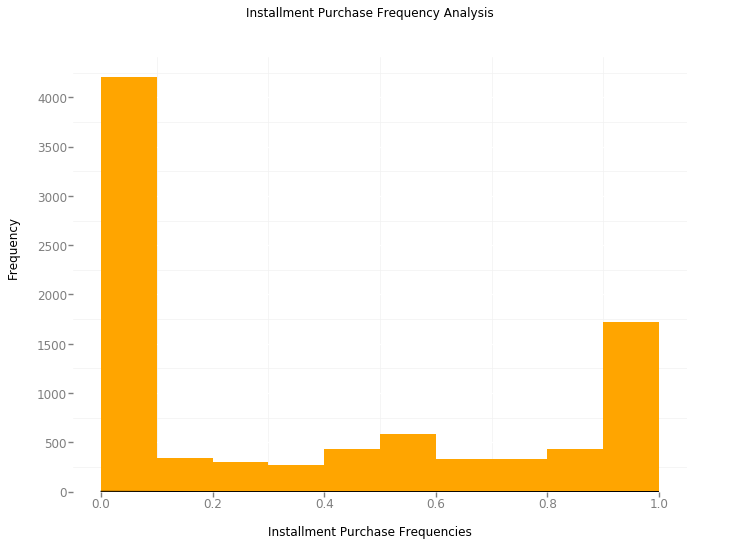

<ggplot: (-9223371861821757992)>

In [43]:
# histogram
ggplot(df, aes(x='PURCHASES_INSTALLMENTS_FREQUENCY'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("Installment Purchase Frequencies")+ ylab('Frequency')+ ggtitle("Installment Purchase Frequency Analysis")+ theme_bw()

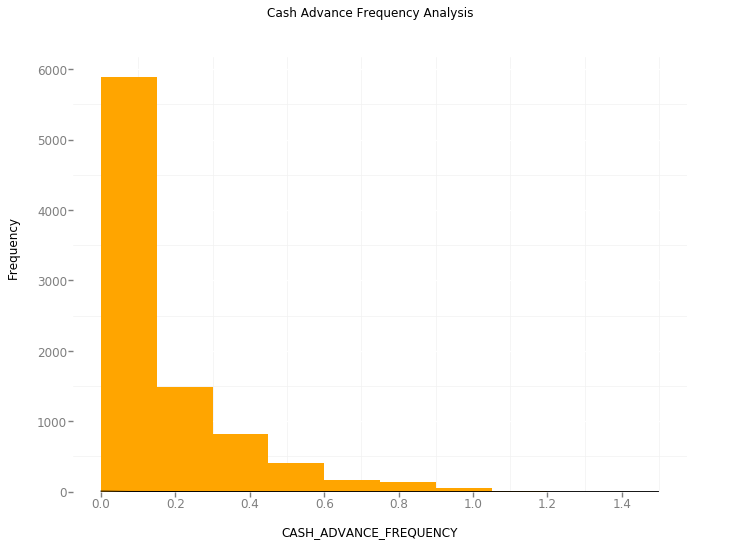

<ggplot: (-9223371861818782808)>

In [44]:
# histogram
ggplot(df, aes(x='CASH_ADVANCE_FREQUENCY'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("CASH_ADVANCE_FREQUENCY")+ ylab('Frequency')+ ggtitle("Cash Advance Frequency Analysis")+ theme_bw()

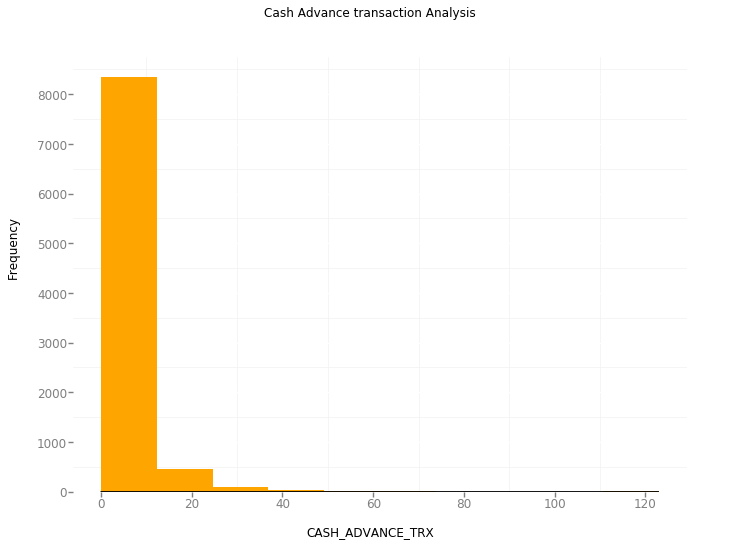

<ggplot: (-9223371861818634124)>

In [45]:
# histogram
ggplot(df, aes(x='CASH_ADVANCE_TRX'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("CASH_ADVANCE_TRX")+ ylab('Frequency')+ ggtitle("Cash Advance transaction Analysis")+ theme_bw()

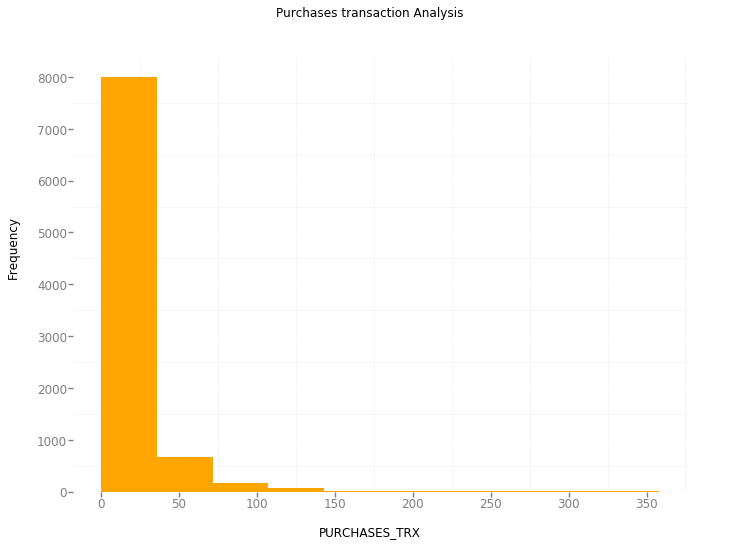

<ggplot: (-9223371861818641492)>

In [46]:
# histogram
ggplot(df, aes(x='PURCHASES_TRX'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("PURCHASES_TRX")+ ylab('Frequency')+ ggtitle("Purchases transaction Analysis")+ theme_bw()

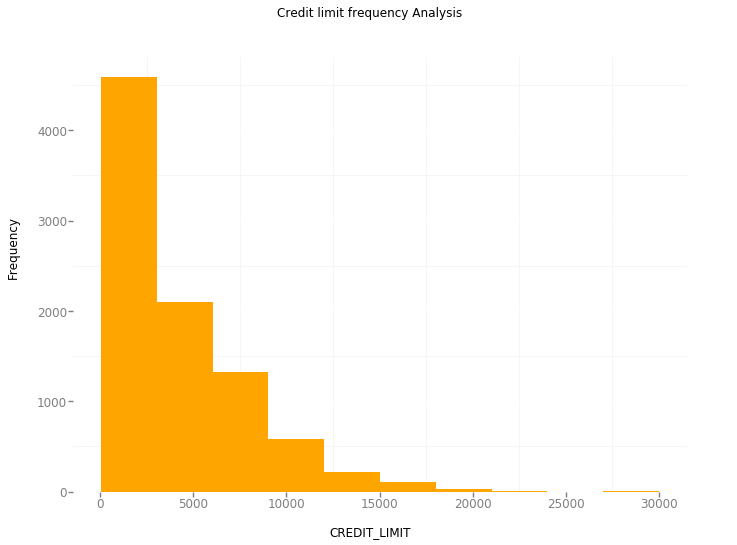

<ggplot: (-9223371861816904288)>

In [47]:
# histogram
ggplot(df, aes(x='CREDIT_LIMIT'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("CREDIT_LIMIT")+ ylab('Frequency')+ ggtitle("Credit limit frequency Analysis")+ theme_bw()

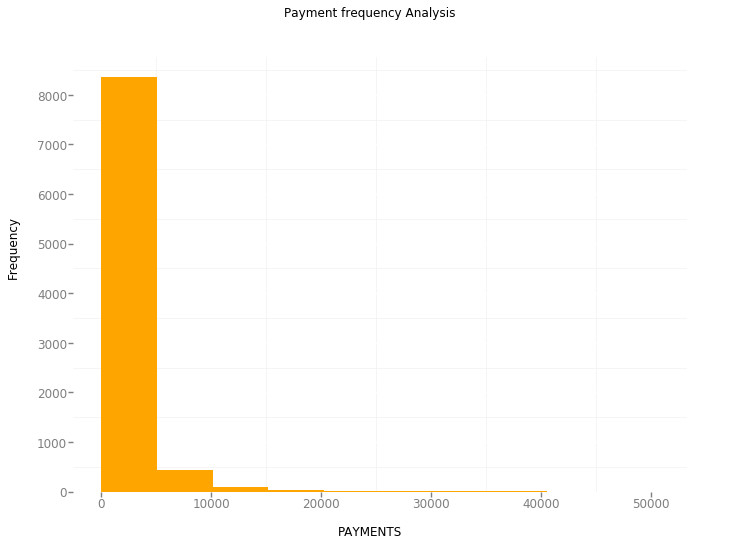

<ggplot: (-9223371861816875512)>

In [48]:
# histogram
ggplot(df, aes(x='PAYMENTS'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("PAYMENTS")+ ylab('Frequency')+ ggtitle("Payment frequency Analysis")+ theme_bw()

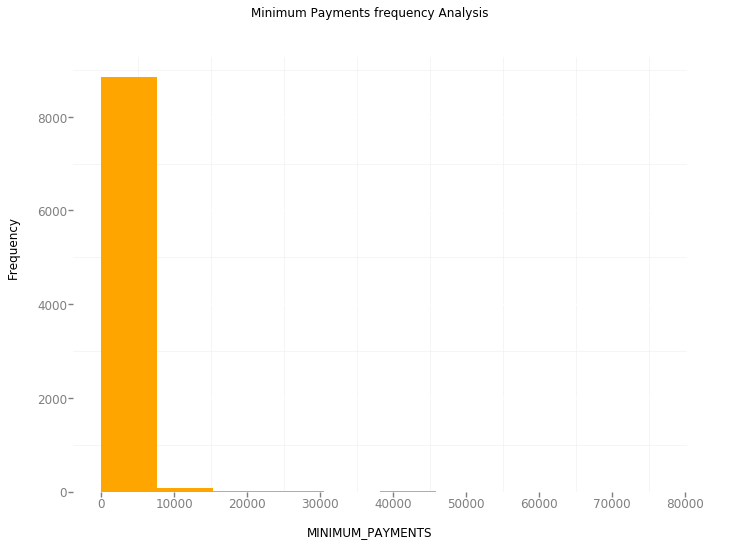

<ggplot: (-9223371861816813832)>

In [49]:
# histogram
ggplot(df, aes(x='MINIMUM_PAYMENTS'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("MINIMUM_PAYMENTS")+ ylab('Frequency')+ ggtitle("Minimum Payments frequency Analysis")+ theme_bw()

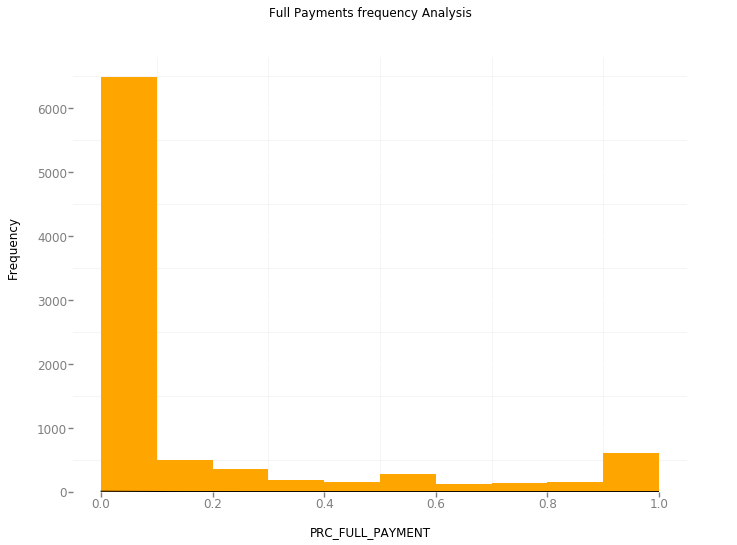

<ggplot: (-9223371861816814048)>

In [50]:
# histogram
ggplot(df, aes(x='PRC_FULL_PAYMENT'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("PRC_FULL_PAYMENT")+ ylab('Frequency')+ ggtitle("Full Payments frequency Analysis")+ theme_bw()

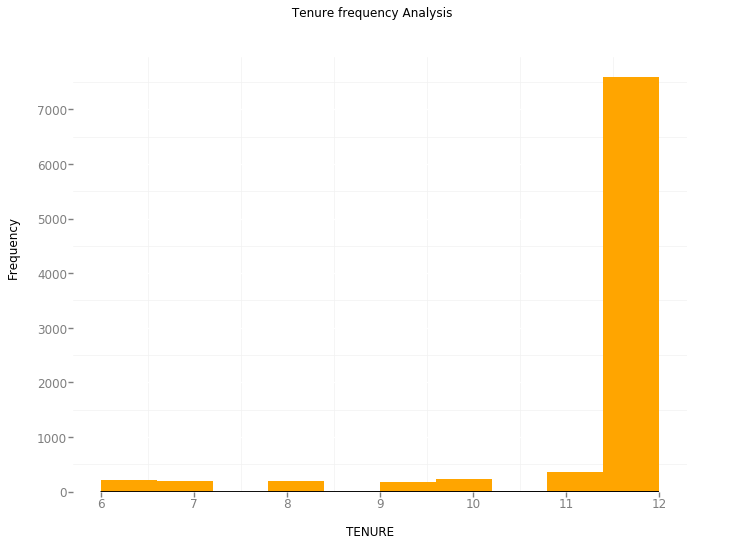

<ggplot: (-9223371861816865484)>

In [51]:
# histogram
ggplot(df, aes(x='TENURE'))+geom_histogram(fill='orange', colour='purple')+\
    geom_density()+\
    theme_bw()+ xlab("TENURE")+ ylab('Frequency')+ ggtitle(" Tenure frequency Analysis")+ theme_bw()

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTH_AVG_PURCHASES,MONTHLY_CASH_ADVANCE,limit_usage,Payment_minpay_Ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.223199,1733.143852,855.109648,0.153715,11.517318,86.175173,88.977984,0.388884,9.073792
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.675367,2895.063757,2356.481943,0.292499,1.338331,180.508787,193.136115,0.389721,118.177172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,166.269650,0.000000,12.000000,3.399375,0.000000,0.041494,0.918910
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,300.072340,0.000000,12.000000,31.936667,0.000000,0.302720,2.052256
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,804.414788,0.142857,12.000000,97.228333,99.085196,0.717571,6.089418
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


In [54]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTH_AVG_PURCHASES,MONTHLY_CASH_ADVANCE,PURCHASE_TYPE,limit_usage,Payment_minpay_Ratio
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,INSTALLMENT,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,NONE,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,ONEOFF,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,441.852935,0.000000,12.0,124.916667,17.149001,ONEOFF,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,ONEOFF,0.681429,2.771075


# Outlier treatment

In [55]:
#Log tranformation to treat outliers
df1=df.drop(['PURCHASE_TYPE'],axis=1).applymap(lambda x: np.log(x+1))

In [56]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTH_AVG_PURCHASES,MONTHLY_CASH_ADVANCE,limit_usage,Payment_minpay_Ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094803,6.624540,5.895537,0.117730,2.519680,3.050877,2.163970,0.296081,1.362080
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819634,1.591763,1.203174,0.211617,0.130367,2.002823,2.429741,0.250303,0.939487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.119607,0.000000,2.564949,1.481458,0.000000,0.040656,0.651757
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.707351,0.000000,2.564949,3.494587,0.000000,0.264455,1.115881
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.691357,0.133531,2.564949,4.587295,4.606022,0.540911,1.958603
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [57]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTH_AVG_PURCHASES,MONTHLY_CASH_ADVANCE,limit_usage,Payment_minpay_Ratio
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.093238,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [58]:
#Mean payment minpay ratio for each category of purchase type
x=df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['Payment_minpay_Ratio']))
type(x)
x.values

array([13.3027695 , 10.11974505,  5.54770857,  7.24053977])

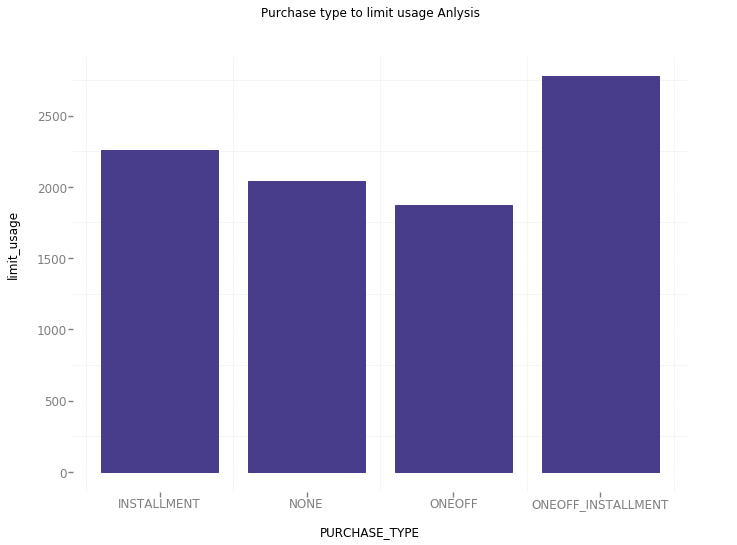

<ggplot: (-9223371861815116188)>

In [59]:
#barplot
ggplot(df, aes(x='PURCHASE_TYPE', y= 'limit_usage'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type='diverging', palette=4)+\
    xlab('PURCHASE_TYPE')+ylab('limit_usage')+ggtitle("Purchase type to limit usage Anlysis")+ theme_bw()

In [60]:
ax.barh?

Object `ax.barh` not found.


Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

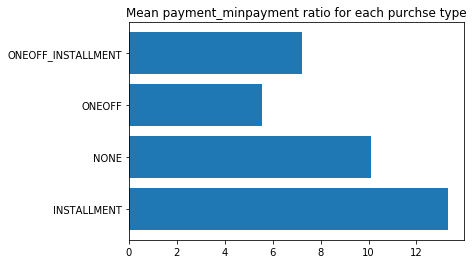

In [61]:
#Barplot for Mean payment_minpayment ratio for each purchse type
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

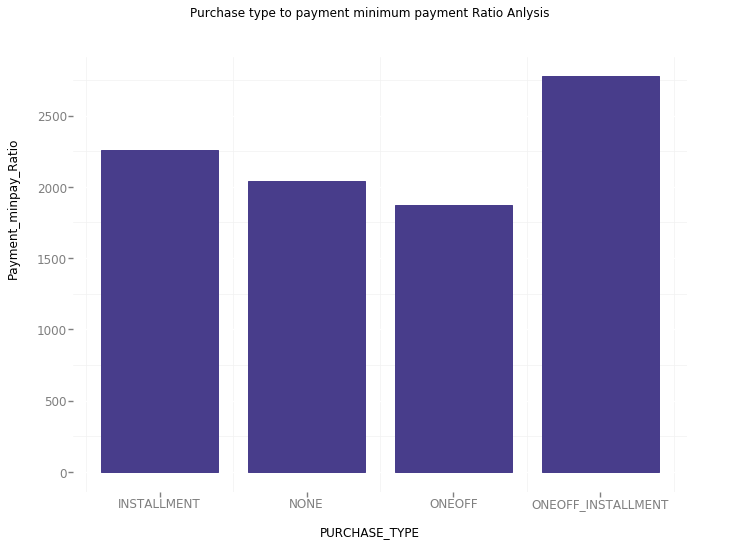

<ggplot: (-9223371861815651308)>

In [62]:
#barplot
ggplot(df, aes(x='PURCHASE_TYPE', y= 'Payment_minpay_Ratio'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type='diverging', palette=4)+\
    xlab('PURCHASE_TYPE')+ylab('Payment_minpay_Ratio')+ggtitle("Purchase type to payment minimum payment Ratio Anlysis")+ theme_bw()

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

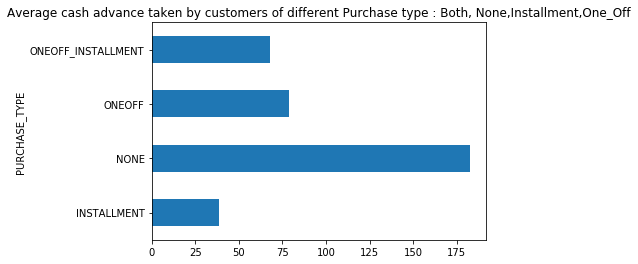

In [63]:
# Barplot for Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_CASH_ADVANCE'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

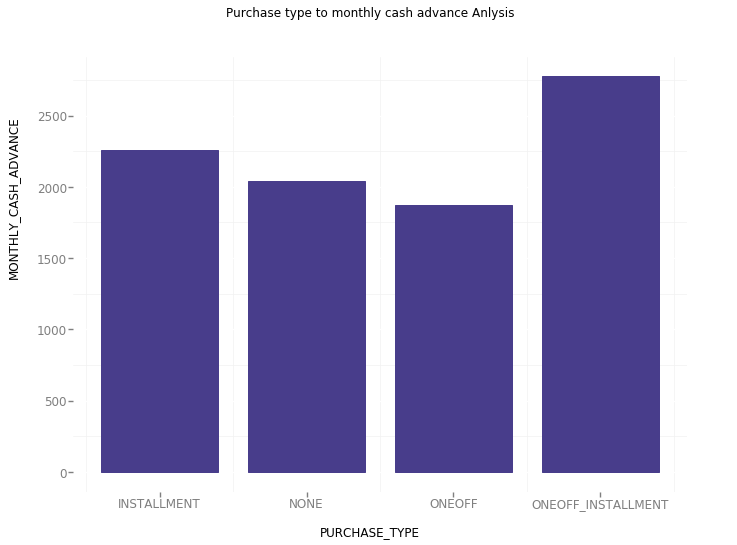

<ggplot: (-9223371861815582784)>

In [64]:
#barplot for Purchase type to monthly cash Advance
ggplot(df, aes(x='PURCHASE_TYPE', y= 'MONTHLY_CASH_ADVANCE'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type='diverging', palette=4)+\
    xlab('PURCHASE_TYPE')+ylab('MONTHLY_CASH_ADVANCE')+ggtitle("Purchase type to monthly cash advance Anlysis")+ theme_bw()

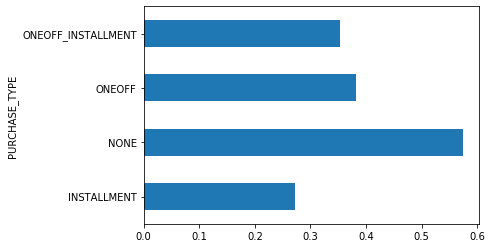

In [65]:
#Bar plot of mean limit usage  for each category of purchase type
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [66]:
#Creating a dummies for each category of Purchase type and concatenating with dataframe  
train=pd.concat([df1,pd.get_dummies(df['PURCHASE_TYPE'])],axis=1)

In [67]:
train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTH_AVG_PURCHASES,MONTHLY_CASH_ADVANCE,limit_usage,Payment_minpay_Ratio,INSTALLMENT,NONE,ONEOFF,ONEOFF_INSTALLMENT
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068,0,1,0,0
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,1,0
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.093238,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000,0,0,1,0
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360,0,0,1,0


In [68]:
cnames =train.columns

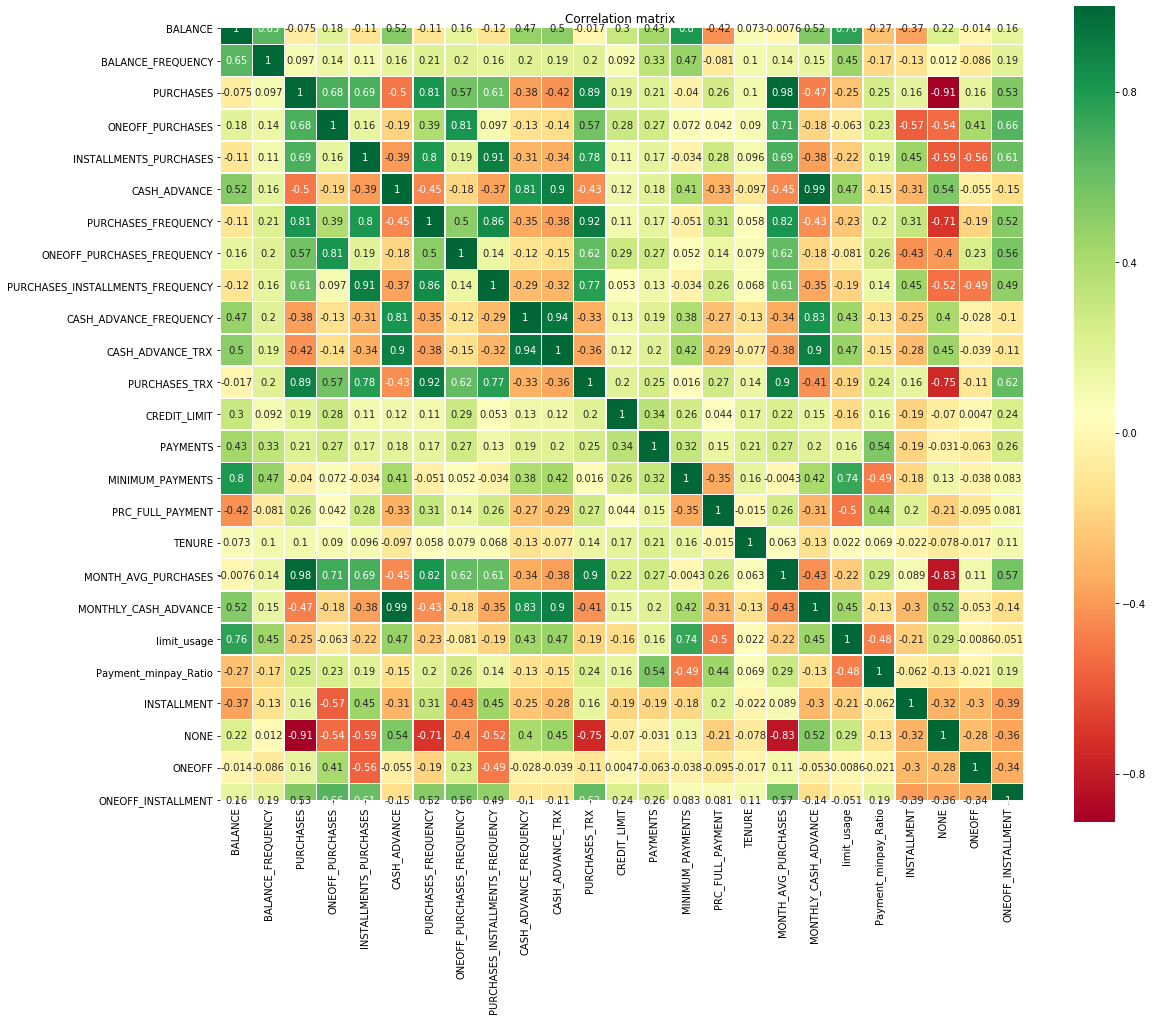

In [69]:
# heatmap using correlation matrix
plt.figure(figsize=(18,15))
_ = sns.heatmap(train[cnames].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

In [70]:
train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTH_AVG_PURCHASES,MONTHLY_CASH_ADVANCE,limit_usage,Payment_minpay_Ratio,INSTALLMENT,NONE,ONEOFF,ONEOFF_INSTALLMENT
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068,0,1,0,0
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,1,0
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.093238,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000,0,0,1,0
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360,0,0,1,0


In [71]:
#Removing the columns used for new feature extraction
df2=train.drop(['BALANCE','PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','TENURE'],axis=1)                          

In [72]:
df2.shape

(8950, 19)

In [73]:
df2.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,MONTH_AVG_PURCHASES,MONTHLY_CASH_ADVANCE,limit_usage,Payment_minpay_Ratio,INSTALLMENT,NONE,ONEOFF,ONEOFF_INSTALLMENT
0,0.597837,0.000000,4.568506,0.000000,0.080042,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,0.000000,6.287695,0.376719,1.574068,0,1,0,0
2,0.693147,6.651791,0.000000,0.693147,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,4.180994,0.000000,0.287197,0.688979,0,0,1,0
3,0.492477,7.313220,0.000000,0.080042,0.000000,0.693147,0.693147,8.922792,0.000000,6.093238,0.000000,4.835620,2.898616,0.200671,0.000000,0,0,1,0
4,0.693147,2.833213,0.000000,0.080042,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,0.847298,0.000000,0.519644,1.327360,0,0,1,0


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
BALANCE_FREQUENCY                   8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT                    8950 non-null float64
MONTH_AVG_PURCHASES                 8950 non-null float64
MONTHLY_CASH_ADVANCE                8950 non-null float64
limit_usage                         8950 non-null float64
Payment_minpay_Ratio                8950 non-null float64
INSTALLMENT            

In [ ]:
#Nomalisation
for i in cnames:
    print(i)
    df2[i] = (df2[i] - min(df2[i]))/(max(df2[i]) - min(df2[i]))

In [75]:
#Loading  kmeans clustering algorithm from sklearn.cluster 
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(df2.iloc[:,0:22])
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

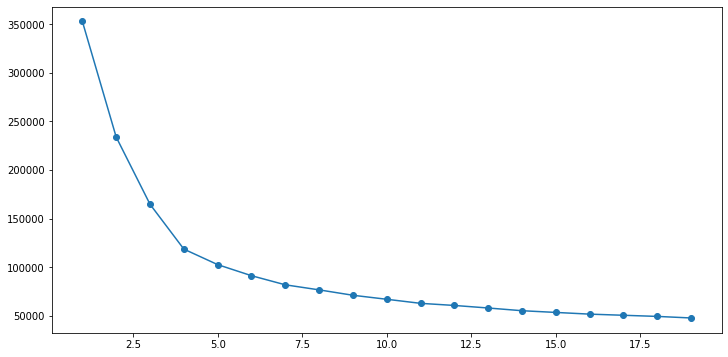

In [76]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [77]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 4).fit(df2.iloc[:,0:22])

In [78]:
df2.shape

(8950, 19)

In [79]:
kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
kmeans_model.labels_

array([3, 1, 2, ..., 3, 1, 2])

In [81]:
pd.Series(kmeans_model.labels_).value_counts()

0    2646
3    2302
1    2158
2    1844
dtype: int64

In [82]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df2.iloc[:,0:21] )
    cluster_errors.append( clusters.inertia_ )

In [83]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [84]:
clusters_df

,num_clusters,cluster_errors
0,1,352597.570614
1,2,233748.030702
2,3,164677.304895
3,4,118593.361712
4,5,102635.337800
5,6,91255.581612
6,7,81879.941406
7,8,76337.394064
8,9,71135.916402
9,10,66954.411857
